In [2]:
import pandas as pd
df = pd.read_csv("GSE312662_gene_counts (1).txt.gz", sep="\t", index_col=0)
df


,NTC_wt_unt_1,NTC_wt_unt_2,NTC_wt_LLOME_1,NTC_wt_LLOME_2,APOL3_KO_unt_1,APOL3_KO_unt_2,APOL3_KO_LLOME_1,APOL3_KO_LLOME_2
Geneid,,,,,,,,
ENSG00000160072,2289,2748,2959,2628,2195,2252,4803,3349
ENSG00000279928,0,0,0,0,0,0,0,1
ENSG00000228037,1,0,0,0,0,0,0,0
ENSG00000142611,0,0,0,0,0,0,0,2
ENSG00000284616,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
ENSG00000271254,637,730,274,276,556,673,388,322
ENSG00000275987,0,0,0,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 62710 entries, ENSG00000160072 to ENSG00000275405
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   NTC_wt_unt_1      62710 non-null  int64
 1   NTC_wt_unt_2      62710 non-null  int64
 2   NTC_wt_LLOME_1    62710 non-null  int64
 3   NTC_wt_LLOME_2    62710 non-null  int64
 4   APOL3_KO_unt_1    62710 non-null  int64
 5   APOL3_KO_unt_2    62710 non-null  int64
 6   APOL3_KO_LLOME_1  62710 non-null  int64
 7   APOL3_KO_LLOME_2  62710 non-null  int64
dtypes: int64(8)
memory usage: 4.3+ MB


In [4]:
df.columns


Index(['NTC_wt_unt_1', 'NTC_wt_unt_2', 'NTC_wt_LLOME_1', 'NTC_wt_LLOME_2',
       'APOL3_KO_unt_1', 'APOL3_KO_unt_2', 'APOL3_KO_LLOME_1',
       'APOL3_KO_LLOME_2'],
      dtype='object')

In [5]:
import pandas as pd

# Create metadata manually based on sample naming
metadata = pd.DataFrame({
    "sample": df.columns,
    "genotype": ["WT", "WT", "WT", "WT", "KO", "KO", "KO", "KO"],
    "treatment": ["unt", "unt", "LLOME", "LLOME", "unt", "unt", "LLOME", "LLOME"]
})

metadata


,sample,genotype,treatment
0,NTC_wt_unt_1,WT,unt
1,NTC_wt_unt_2,WT,unt
2,NTC_wt_LLOME_1,WT,LLOME
3,NTC_wt_LLOME_2,WT,LLOME
4,APOL3_KO_unt_1,KO,unt
5,APOL3_KO_unt_2,KO,unt
6,APOL3_KO_LLOME_1,KO,LLOME
7,APOL3_KO_LLOME_2,KO,LLOME


In [6]:
untreated_samples = ["NTC_wt_unt_1", "NTC_wt_unt_2", "APOL3_KO_unt_1", "APOL3_KO_unt_2"]
df_unt = df[untreated_samples]
df_unt


,NTC_wt_unt_1,NTC_wt_unt_2,APOL3_KO_unt_1,APOL3_KO_unt_2
Geneid,,,,
ENSG00000160072,2289,2748,2195,2252
ENSG00000279928,0,0,0,0
ENSG00000228037,1,0,0,0
ENSG00000142611,0,0,0,0
ENSG00000284616,0,0,0,0
...,...,...,...,...
ENSG00000271254,637,730,556,673
ENSG00000275987,0,0,0,0
ENSG00000268674,0,0,0,0


In [7]:
df_var = df_unt[df_unt.var(axis=1) > 0]
df_var

,NTC_wt_unt_1,NTC_wt_unt_2,APOL3_KO_unt_1,APOL3_KO_unt_2
Geneid,,,,
ENSG00000160072,2289,2748,2195,2252
ENSG00000228037,1,0,0,0
ENSG00000157911,532,689,552,561
ENSG00000269896,48,95,50,70
ENSG00000228463,4,8,14,9
...,...,...,...,...
ENSG00000278066,0,0,2,0
ENSG00000276345,6,4,5,2
ENSG00000271254,637,730,556,673


In [8]:
import numpy as np
df_log = np.log2(df_var+1)
df_log

,NTC_wt_unt_1,NTC_wt_unt_2,APOL3_KO_unt_1,APOL3_KO_unt_2
Geneid,,,,
ENSG00000160072,11.161132,11.424691,11.100662,11.137632
ENSG00000228037,1.000000,0.000000,0.000000,0.000000
ENSG00000157911,9.057992,9.430453,9.111136,9.134426
ENSG00000269896,5.614710,6.584963,5.672425,6.149747
ENSG00000228463,2.321928,3.169925,3.906891,3.321928
...,...,...,...,...
ENSG00000278066,0.000000,0.000000,1.584963,0.000000
ENSG00000276345,2.807355,2.321928,2.584963,1.584963
ENSG00000271254,9.317413,9.513728,9.121534,9.396605


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pc_values = pca.fit_transform(df_log.T)
pc_values

array([[   2.04854385, -105.04450699,    7.9265044 ],
       [ 102.03333554,   38.9572696 ,   25.22427463],
       [ -79.08666602,   38.96895312,   63.19973481],
       [ -24.99521337,   27.11828426,  -96.35051384]])

In [10]:
pca.explained_variance_ratio_


array([0.37533677, 0.32133039, 0.30333284])

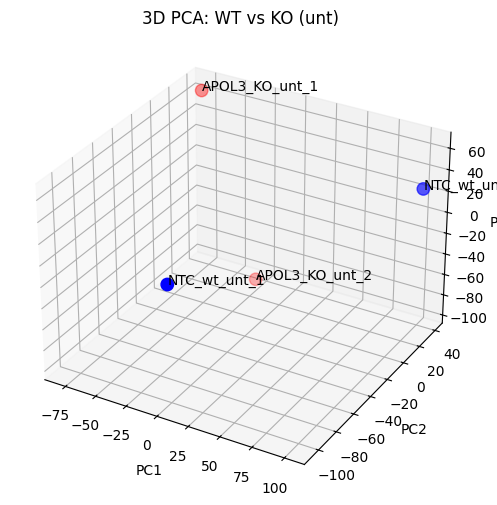

In [11]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

labels = ["WT", "WT", "KO", "KO"]
colors = ["blue" if l=="WT" else "red" for l in labels]

ax.scatter(pc_values[:,0], pc_values[:,1], pc_values[:,2], c=colors, s=80)

sample_names = df_log.T.index
for i, name in enumerate(sample_names):
    ax.text(pc_values[i,0], pc_values[i,1], pc_values[i,2], name)  

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.title("3D PCA: WT vs KO (unt)")
   
plt.show()
